In [1]:
### Read me , one sample momenture stratege expericence 

In [2]:
pip install bs4


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install matplotlib


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
pip install xlsxwriter


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lxml

In [ ]:
pip install urllib.request

In [5]:
import bs4
import numpy as py
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import xlsxwriter
from itertools import repeat
import urllib.request as urllib2
from urllib.request import urlopen
from io import StringIO
import csv
import numpy as np
import lxml


In [ ]:
url ='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'#get the sourse website
page = urllib2.urlopen(url)


In [ ]:
request1=requests.get(url)
soup = BeautifulSoup(request1.text)

tb=soup.find_all('table',attrs = {'id':'constituents'})
for i in tb:
    j = i.find_all('tr')

In [ ]:
jj = j[1:]
k = []
for i in jj:#find the company name of sp500
    k.append(i.find_all('td')[0].text.strip())
    
    
    
h = []
for i in k:
    if '.' not in i:
        h.append(i)
    else:
        h.append(i.replace('.','-'))#change all name in the same format

In [ ]:

for i in h:#download the stock data 
    try:
        urlcsv = f'https://query1.finance.yahoo.com/v7/finance/download/{i}?period1=1546300800&period2=1577836800&interval=1d&events=history&includeAdjustedClose=true'
        data=urlopen(urlcsv).read().decode('ascii','ignore')
        dataf=StringIO(data)
        csvReader=pd.read_csv(dataf)
        csvReader.to_csv(f'/Users/smile/Desktop/WS/sp_{i}.csv', mode='a',encoding='utf-8',header=0,index=False)
    except:
        pass
        print(i)
        


        #four stock can not find the data because, they are not get public in that time
        #CARR 2.19.2022
        #CEG 2.2.2022
        #OGN  3.6.2021
        #OTIS since  3.19.2020


    #for row in csvReader:
     # print(row)

    #for table in pd.read_html(urlcsv):
        #table.to_csv(f'/Users/smile/Desktop/WS/sp_{i}.csv', mode='a',encoding='utf-8',header=0,index=False)

In [6]:
import os
import glob
os.chdir('/Users//smile//Desktop//WS')### open the indicate contect

path = '/Users//smile//Desktop//WS'
c = glob.glob(path + '/*.csv')
jj = []
for i in c:
    jj.append(i.split('WS/')[1])###save the name of csv data
    
    

In [7]:
jjl = []
for i in jj:   ### combiane data to the three column dataframe with the value of Date ,close price,Ticker
    v = pd.read_csv(i,header = None)
    v['Ticker'] = i.split('_')[1].split('.')[0]
    v = v[[0,4,'Ticker']]
    v.columns = ['Date','Close price','Ticker']
    v.index = v.Date
    v = v.drop('Date',axis=1)
    jjl.append(v)
    

In [8]:
bb = pd.concat(jjl)

In [9]:
b2 = bb.copy()


In [10]:
m = []
m.append(b2.index.unique())### find all the time period

In [11]:
hj = []
for i in m:### dont know reason , data been copied three times, so drop all duplicated value 
    hj.append(b2.loc[i].drop_duplicates())

In [12]:
kk = pd.concat(hj,axis=0)

In [13]:
ti = kk.Ticker.unique()

In [14]:
b3 = b2.copy()
b3['Date'] = b3.index
b3.index = b3.Ticker
b3 = b3.drop('Ticker',axis=1) ## make data look better


In [15]:
kl = []
for i in ti:
    tar = b3.loc[i].drop_duplicates()
    tar.index = tar.Date
    c = tar['Close price']
    c = pd.DataFrame(tar['Close price'])
    c.columns = [i]
    kl.append(c)

In [16]:
target = pd.concat(kl,axis=1) ## now

In [18]:
rr = target / target.shift(1) - 1 ### rate of return
r = 1+rr ###return+1

In [19]:
### for long

def f(x,y):### x represents the ticker position,y is the strategy beginning date
    try:
        qi = rr[ti[x]].iloc[y-3:y]# qi is the target return period, I take three consecutive dates as strategy implimentation period
        if (qi.isna()).any():
            pass
        elif (qi.dropna() < 0).any():
            return('na')
        else:
            return(ti[x])
    except:
        pass
        

In [20]:
### for short

def y(x,y):
    try:
        qi = rr[ti[x]].iloc[y-3:y]
        if (qi.isna()).any():
            pass
        elif (qi.dropna() > 0).any():
            return('na')
        else:
            return(ti[x])
    except:
        pass
        

In [21]:
kk = []
for q in range(4,252):
    vk = []
    for i in range(len(ti)):
        w = f(i,q)
        if w not in ['na',None]:
            vk.append(w)
        else:
            pass
    kk.append(vk)#### the target names at the specified date under Long strategy


In [22]:
kki = []
for q in range(4,252):
    vk = []
    for i in range(len(ti)):
        g = y(i,q)
        if g not in ['na',None]:
            vk.append(g)
        else:
            pass
    kki.append(vk)#### the target names at the specified date under Short strategy

In [23]:
jk = pd.DataFrame(kk).T

jk.columns = m[0][4:]

In [24]:
ret = []###
for i in range(len(jk.columns)-1):
    ty = kk[i]
    oi = np.average(rr.loc[jk.columns[i+1]][ty]) ####oi is the return of Long strategy with EQUAL WEIGHTS
    ret.append([oi])

In [25]:
rett = []
for i in range(len(jk.columns)-1):
    ty = kki[i]
    if len(ty) > 0:
        oi = np.average(rr.loc[jk.columns[i+1]][ty]) ####oi is the return of Short strategy with EQUAL WEIGHTS
        rett.append([oi * (-1)])
    else:
        oi = 'No short position taday'
        rett.append([oi])


In [26]:
long = pd.DataFrame(ret,jk.columns[0:-1])
long.columns = ['Return']
long.sum()

Return    0.167873
dtype: float64

In [27]:
long

,Return
Date,
2019-01-08,0.000962
2019-01-09,0.007633
2019-01-10,0.001324
2019-01-11,-0.006295
2019-01-14,0.007784
...,...
2019-12-23,0.000248
2019-12-24,0.004222
2019-12-26,-0.001698


In [28]:
short = pd.DataFrame(rett,index = jk.columns[0:-1])
short.columns = ['Return']
short

,Return
Date,
2019-01-08,-0.008805
2019-01-09,-0.004109
2019-01-10,0.001692
2019-01-11,0.005424
2019-01-14,-0.013086
...,...
2019-12-23,-0.002377
2019-12-24,-0.004389
2019-12-26,0.000704


In [29]:
SR1 = (long.sum() - 0.01) / long.std()


In [30]:
TR = rr.sum(axis = 0)

In [31]:
import matplotlib.pyplot as plt

In [32]:
TR2 = rr.sum(axis=1) /  499 ###average of equal weights of  all stock

In [33]:
TR2T = pd.DataFrame(TR2[long.index])
TR2T.columns = ['Total Universe']

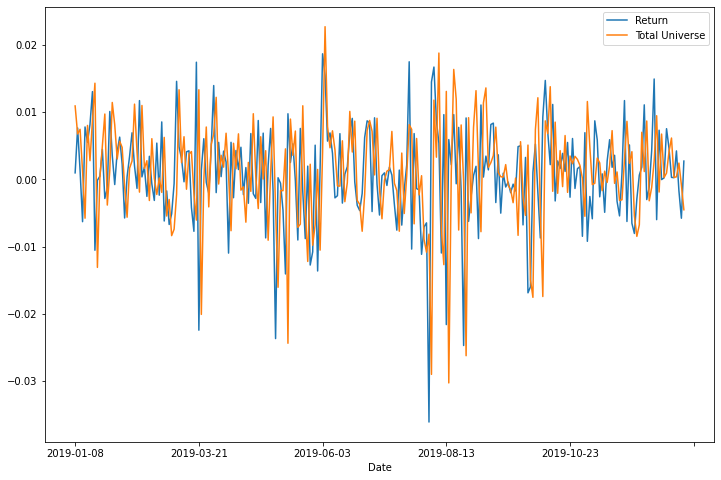

In [34]:
res = pd.concat([long,TR2T],axis=1).plot(figsize = (12,8));

In [35]:
T1 = long.sum()[0]
S1 = long.std()[0]
T2 = TR2T.sum()[0]
S2 = TR2T.std()[0]

In [36]:
re = pd.DataFrame([[T1,S1],[T2,S2]],index = ['MoM','ew'])
re.columns = ['Return','STD']
re

,Return,STD
MoM,0.167873,0.007414
ew,0.257730,0.007596


In [41]:
pip install statsmodels

  Using cached statsmodels-0.13.2-cp38-cp38-macosx_10_9_x86_64.whl (9.6 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.2
    Uninstalling packaging-21.2:
      Successfully uninstalled packaging-21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
poetry 1.1.7 requires packaging<21.0,>=20.4, but you have packaging 21.3 which is incompatible.

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import statsmodels

In [43]:
from statsmodels.tsa.ar_model import AutoReg

In [45]:
import matplotlib.pyplot as plt


In [279]:
import pandas
from pandas.core.frame import DataFrame

,SBAC,MDT,TER,FLT,CMCSA,FANG,RF,UAL,ETSY,AMCR,...,PKG,AEP,CTXS,TRV,CRL,SWK,FOXA,FOX,DOW,CTVA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.011135,-0.028094,-0.067423,-0.021288,0.007856,0.009872,-0.001463,-0.049656,-0.020638,0.000000,...,-0.019633,-0.002331,-0.014382,-0.017977,-0.056441,-0.029156,NaN,NaN,NaN,NaN
2019-01-04,0.002461,0.031363,0.050676,0.018392,0.033776,0.039205,0.036630,0.033500,0.079731,0.000000,...,0.039571,0.009207,0.018860,0.029672,0.047033,0.050678,NaN,NaN,NaN,NaN
2019-01-07,0.010126,-0.064450,0.001608,0.005894,-0.010612,0.027019,0.016961,0.006652,0.037626,0.021505,...,0.009864,-0.005583,0.003995,-0.003202,0.025604,0.021112,NaN,NaN,NaN,NaN
2019-01-08,0.016222,0.007035,-0.011878,0.007633,0.008185,0.022605,0.010424,-0.010213,0.044794,-0.006316,...,0.025741,0.012324,0.007763,-0.003888,0.044598,0.018449,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.001912,-0.001054,-0.001158,0.003198,0.009751,0.012917,0.001747,-0.003242,-0.002456,-0.010999,...,-0.006812,0.000960,0.004630,-0.002936,-0.000198,-0.009539,-0.004138,-0.003549,-0.000546,0.005234
2019-12-26,0.004622,-0.010460,0.009277,-0.008652,0.009881,0.012530,0.003488,0.001234,0.016566,0.005561,...,-0.000356,0.000426,0.005331,0.003387,0.003899,0.003453,0.007239,0.008219,0.005829,0.013190
2019-12-27,0.000622,0.006840,-0.007037,0.009965,0.002891,-0.005914,-0.005794,-0.009971,-0.009469,0.009217,...,-0.004099,0.003302,-0.004224,0.003742,0.000197,0.001449,-0.004259,-0.002038,-0.007063,-0.001713


In [1037]:
x=[9,8,7,6,5,4,3,2,1]
newrr= rr.iloc[1:200,:]
result=[]

for i in rr.columns:
     a = AutoReg(newrr[i],lags = x).fit()
     t=pd.DataFrame([a.params,a.pvalues])
     result.append(t)

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

MissingDataError: exog contains inf or nans

In [1038]:
hj = []
for i in range(len(ar_result)):
    tar = np.where(ar_result[i].loc[1] < 0.05)[0].tolist()
    li = ar_result[i].loc[1].index[tar].tolist()
    try:
        va = ar_result[i][li].iloc[0]
    except:
        pass
    hj.append(va)

In [1039]:
jh = []
for i in hj:
    if 'const' in i.index: 
        a = i.drop('const')
        jh.append(a)
    else:
        jh.append(i)

In [1040]:
def f(x):
    w = []
    for q in x.index.tolist():
        w.append(q.split('.L')[1])
    return(w)

In [1041]:
li = []
for i in jh:
    if len(i) == 0:
        li.append('None')
    else:
        va = f(i)
        li.append(va)

In [1042]:
va = []
for i in jh:
    if len(i) == 0:
        va.append('None')
    else:
        
        va.append(i.values.tolist())

In [1043]:
res = pd.DataFrame([li,va])
res.columns = rr.columns
res = res.T

In [1044]:
res.columns = ['Lags','Params']
rr_copy=rr.copy()

In [1045]:
llll=res.index[np.where(res['Lags'] == 'None')[0]]

In [1046]:
newrr=newrr.drop(columns = llll,axis=1)

In [1047]:
newres=res.drop(index = llll.tolist())
newres

,Lags,Params
MDT,[2],[-0.1637493102904108]
TER,[5],[-0.16709402175122062]
FLT,"[2, 3, 5, 7]","[-0.1614653080328031, -0.2206085183988974, -0...."
FANG,[8],[0.16261061913400904]
AMCR,[3],[-0.17914747665306735]
...,...,...
AEP,[6],[-0.16750270636214748]
CTXS,"[2, 7]","[0.1692514086452809, 0.3128511061915553]"
CRL,[4],[-0.16168631931386268]
SWK,[8],[-0.17795945593685622]


In [1348]:
def y(x):
    y = []
    if len(x) == 1:
        y.append(float(x[0]))
    else:
        for i in x:
            y.append(float(i))
    return(y)

In [1349]:
def f(x,z):
    o = []
    lags = np.subtract(y(newres['Lags'][x]),1).tolist()
    params = newres['Params'][x]
    t = pd.DataFrame([lags,params])
    for i in range(t.shape[1]):
        re = newrr[x][int(z - t[i][0])] 
        if re > 0:
            o.append(1)
        else:
            o.append(-1)
    return(o)

In [1350]:
def f2(x):
    j = []
    for i in newrr.columns:
        j.append(f(i,x))
    return(j)

In [1351]:
gh = []
for i in range(9,newrr.shape[0]):
    gh.append(f2(i))

In [1352]:
result = pd.DataFrame(gh)
result.columns = newrr.columns

In [1353]:
result.index = newrr.index[range(9,newrr.shape[0])]

In [1354]:
result

,MDT,TER,FLT,FANG,AMCR,NVR,NLOK,BF-B,FBHS,APH,...,NWL,SO,PSA,WAB,PKG,AEP,CTXS,CRL,SWK,CTVA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-16,[1],[1],"[1, -1, 1, 1]",[1],[-1],[1],[1],[-1],"[1, 1]",[1],...,[-1],"[1, 1]",[1],"[1, -1]",[1],[-1],"[1, 1]",[-1],[1],[-1]
2019-01-17,[1],[1],"[1, 1, -1, 1]",[1],[-1],[-1],[1],[1],"[1, 1]",[1],...,[1],"[1, -1]",[1],"[1, 1]",[-1],[1],"[-1, 1]",[-1],[1],[-1]
2019-01-18,[1],[-1],"[1, 1, -1, 1]",[1],[-1],[-1],[1],[-1],"[1, 1]",[1],...,[1],"[1, 1]",[1],"[1, 1]",[1],[-1],"[1, 1]",[-1],[1],[-1]
2019-01-22,[-1],[1],"[1, 1, 1, -1]",[-1],[1],[-1],[-1],[-1],"[1, 1]",[1],...,[-1],"[1, 1]",[1],"[-1, 1]",[-1],[-1],"[1, 1]",[1],[1],[-1]
2019-01-23,[-1],[-1],"[-1, 1, 1, -1]",[-1],[-1],[-1],[-1],[1],"[-1, 1]",[-1],...,[-1],"[-1, 1]",[-1],"[-1, -1]",[1],[1],"[-1, -1]",[1],[1],[-1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-10,[1],[1],"[1, -1, 1, -1]",[-1],[-1],[-1],[-1],[1],"[1, 1]",[1],...,[1],"[1, -1]",[1],"[1, -1]",[1],[1],"[1, -1]",[1],[-1],[1]
2019-10-11,[1],[-1],"[1, 1, -1, 1]",[-1],[1],[-1],[1],[1],"[1, -1]",[1],...,[1],"[-1, -1]",[1],"[1, 1]",[-1],[1],"[1, 1]",[-1],[-1],[1]
2019-10-14,[1],[-1],"[1, 1, -1, 1]",[1],[-1],[-1],[-1],[-1],"[1, 1]",[1],...,[1],"[-1, 1]",[-1],"[1, 1]",[1],[1],"[1, 1]",[1],[1],[-1]


In [1355]:
def f3(x):
    if len(x) == 1:
        y = x
    else:
        if np.sum(x)!= len(x):
            y = 0
        else:
            y = x[0]
    return(y)

In [1356]:
ret = []
for q in range(result.shape[0]):
    ty = []
    for i in result.columns:
        ind = result.index[q]
        try:
            ind2 = result.index[q + 1]
            a = np.sum(f3(result[i][ind])) * newrr[i][ind2]
            ty.append(a)
        except:
            pass
    ret.append(ty)
    
ret2 = []  
for i in range(len(ret)):
    ret2.append(np.average(ret[i][0:-1]))
    
ret2

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.0028609367441082634,
 0.0042385482915401635,
 -0.00694651883071239,
 0.00022930095190682668,
 0.0019263666732347122,
 0.001765730839124568,
 0.0005073991873697873,
 1.891871498355844e-05,
 0.0020933506186078523,
 0.00300922439423687,
 -0.0008296093800810265,
 0.001402409533022124,
 -0.0001826322178587526,
 -0.00040285563409853787,
 -0.0013309307621220108,
 0.0003023780269021377,
 -0.00010451705798405219,
 0.002531464495577362,
 0.0016207153621855793,
 -0.00016279032151977183,
 0.0004937044745357889,
 0.0005288239712356,
 -0.0009500218193240992,
 -0.0003741945511854594,
 0.0018817859540991078,
 -0.0009971671998018012,
 -0.0013017416080581391,
 0.0018486613292828088,
 -0.0010919032630079828,
 0.0017215966675146177,
 -0.001219465973835328,
 0.0002892899495453669,
 -0.0015346046194552121,
 -4.4762107459213995e-05,
 0.00039114130721797346,
 -0.0024720025755350064,
 0.0012455171130700317,
 0.00022232459004424657,
 0.0009229824861506307,
 0.00018893866811026374,
 7.037630375020254e-05,
 -0

In [1357]:
yt = []
for i in ret2:
    yt.append(i + 1)
ret2 = yt

In [1358]:
r1 = (pd.Series(yt).prod() - 1) * (252 / len(yt))
s1 = np.std(yt[0:-1]) * np.sqrt((252 / len(yt)))
SR1 = (r1 / s1 )  
SR1

2.456879226110551

In [1359]:
newrr2 = rr.iloc[200:,:]
newrr2 = newrr2.drop(columns = llll)

In [1360]:
gh2 = []
for i in range(9,newrr2.shape[0]):
    gh2.append(f2(i))

In [1361]:
result2 = pd.DataFrame(gh2)
result2.columns = newrr2.columns
result2.index = newrr2.index[range(9,newrr2.shape[0])]

In [1362]:
result2

,MDT,TER,FLT,FANG,AMCR,NVR,NLOK,BF-B,FBHS,APH,...,NWL,SO,PSA,WAB,PKG,AEP,CTXS,CRL,SWK,CTVA
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,[1],[1],"[1, -1, 1, 1]",[1],[-1],[1],[1],[-1],"[1, 1]",[1],...,[-1],"[1, 1]",[1],"[1, -1]",[1],[-1],"[1, 1]",[-1],[1],[-1]
2019-10-31,[1],[1],"[1, 1, -1, 1]",[1],[-1],[-1],[1],[1],"[1, 1]",[1],...,[1],"[1, -1]",[1],"[1, 1]",[-1],[1],"[-1, 1]",[-1],[1],[-1]
2019-11-01,[1],[-1],"[1, 1, -1, 1]",[1],[-1],[-1],[1],[-1],"[1, 1]",[1],...,[1],"[1, 1]",[1],"[1, 1]",[1],[-1],"[1, 1]",[-1],[1],[-1]
2019-11-04,[-1],[1],"[1, 1, 1, -1]",[-1],[1],[-1],[-1],[-1],"[1, 1]",[1],...,[-1],"[1, 1]",[1],"[-1, 1]",[-1],[-1],"[1, 1]",[1],[1],[-1]
2019-11-05,[-1],[-1],"[-1, 1, 1, -1]",[-1],[-1],[-1],[-1],[1],"[-1, 1]",[-1],...,[-1],"[-1, 1]",[-1],"[-1, -1]",[1],[1],"[-1, -1]",[1],[1],[-1]
2019-11-06,[1],[1],"[1, -1, 1, 1]",[1],[-1],[1],[1],[-1],"[-1, 1]",[1],...,[1],"[1, 1]",[-1],"[1, -1]",[1],[1],"[1, 1]",[1],[-1],[-1]
2019-11-07,[1],[1],"[-1, 1, 1, 1]",[1],[1],[1],[1],[1],"[-1, -1]",[1],...,[1],"[1, -1]",[1],"[-1, 1]",[1],[1],"[-1, -1]",[-1],[-1],[-1]
2019-11-08,[-1],[-1],"[1, -1, -1, 1]",[1],[-1],[-1],[1],[1],"[1, -1]",[1],...,[1],"[-1, 1]",[1],"[-1, -1]",[-1],[1],"[1, 1]",[1],[1],[-1]
2019-11-11,[-1],[1],"[-1, 1, 1, 1]",[1],[-1],[1],[1],[-1],"[1, -1]",[-1],...,[-1],"[-1, 1]",[1],"[1, -1]",[1],[1],"[-1, 1]",[-1],[1],[-1]


In [1363]:
ret = []
for q in range(result2.shape[0]):
    ty = []
    for i in result2.columns:
        ind = result2.index[q]
        try:
            ind2 = result2.index[q + 1]
            a = np.sum(f3(result2[i][ind])) * newrr2[i][ind2]
            ty.append(a)
        except:
            pass
    ret.append(ty)
    
yt = []
for i in ret:
    yt.append(np.average(i))

ret3 = []
for i in yt:
    ret3.append(i + 1)

/Users/smile/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/smile/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [1364]:
r2 = (pd.Series(ret3).prod() - 1) * (252 / len(ret3))
s2 = np.std(ret3[0:-1]) * np.sqrt((252 / len(ret3)))
SR2 = (r2  / s2 ) 
SR2

29.733691583469

In [1365]:
tt = []
for i in rr.index[1:]:
    da = pd.Series(rr.loc[i]).dropna()
    p = np.average(da)
    tt.append(p)
rt = []
for i in tt:
    rt.append(1 + i)
rtt = pd.Series(rt).prod() - 1
st = np.std(rt)
SRT = rtt / st

In [1378]:
final = pd.DataFrame([[r1,r2,rtt],[s1,s2,st],[SR1,SR2,SRT]])
final.index = ['Ann-Return','Ann-Std','Ann-SR']
final.columns = ['In-sample','Out-Of-Sample','Equal-Weights']

In [1379]:
final

,In-sample,Out-Of-Sample,Equal-Weights
Ann-Return,0.004653,0.098414,0.320117
Ann-Std,0.001894,0.003310,0.007937
Ann-SR,2.456879,29.733692,40.330764
